In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

# change directory to excel file and read excel file
df = pd.read_excel('C:/Anaconda3/projects/oled/oled.xlsx', sheetname='extend_side')
print(df.shape)
df.head()

(185, 21)


,no,homo1,homo2,homo3,homo4,thick_htl,triplet1,LUMO,HOMO,triplet2,...,lumo_d1,homo_d1,tripletdopant,triplet3,thick_etl,lumo5,lumo6,wf,cd/A,label
0,1,5.2,5.8,5.9,5.9,30,3.00,1.09,5.34,2.91,...,2.21,4.95,2.58,3.36,35,2.50,2.80,3.5,28.24,b
1,2,9.5,5.8,5.8,5.8,40,2.87,2.02,5.56,2.84,...,3.00,5.70,2.70,2.75,45,2.73,2.73,4.3,40.80,a
2,3,5.3,5.6,5.6,5.6,70,2.87,2.40,5.90,3.00,...,3.00,5.70,2.70,2.75,45,2.73,2.73,3.5,26.30,b
3,4,5.2,5.2,5.2,5.2,0,0.00,2.70,5.71,NaN,...,2.60,6.20,NaN,0.00,0,4.20,4.20,4.2,3.38,c
4,5,5.2,5.8,5.8,5.8,5,2.60,2.02,5.35,2.60,...,0.00,0.00,0.00,2.60,30,2.80,2.80,3.5,1.00,c


In [2]:
#drop the missing data
df.dropna(axis=0, inplace=True)
print(df.shape)

(143, 21)


In [3]:
df = df[list(df.columns)[1:]]
print(df.shape)
df.head()

(143, 20)


,homo1,homo2,homo3,homo4,thick_htl,triplet1,LUMO,HOMO,triplet2,thick,lumo_d1,homo_d1,tripletdopant,triplet3,thick_etl,lumo5,lumo6,wf,cd/A,label
0,5.2,5.8,5.9,5.9,30,3.00,1.09,5.34,2.91,25,2.21,4.95,2.58,3.36,35,2.50,2.80,3.5,28.24,b
1,9.5,5.8,5.8,5.8,40,2.87,2.02,5.56,2.84,20,3.00,5.70,2.70,2.75,45,2.73,2.73,4.3,40.80,a
2,5.3,5.6,5.6,5.6,70,2.87,2.40,5.90,3.00,20,3.00,5.70,2.70,2.75,45,2.73,2.73,3.5,26.30,b
4,5.2,5.8,5.8,5.8,5,2.60,2.02,5.35,2.60,30,0.00,0.00,0.00,2.60,30,2.80,2.80,3.5,1.00,c
9,9.5,5.5,5.5,5.5,45,2.87,2.55,5.90,2.80,20,2.20,4.80,2.59,2.75,45,2.73,2.73,4.3,60.30,a


In [4]:
X = df[list(df.columns)[:-2]]
y = df[['cd/A']]
print(X.shape)
X.head()

(143, 18)


,homo1,homo2,homo3,homo4,thick_htl,triplet1,LUMO,HOMO,triplet2,thick,lumo_d1,homo_d1,tripletdopant,triplet3,thick_etl,lumo5,lumo6,wf
0,5.2,5.8,5.9,5.9,30,3.00,1.09,5.34,2.91,25,2.21,4.95,2.58,3.36,35,2.50,2.80,3.5
1,9.5,5.8,5.8,5.8,40,2.87,2.02,5.56,2.84,20,3.00,5.70,2.70,2.75,45,2.73,2.73,4.3
2,5.3,5.6,5.6,5.6,70,2.87,2.40,5.90,3.00,20,3.00,5.70,2.70,2.75,45,2.73,2.73,3.5
4,5.2,5.8,5.8,5.8,5,2.60,2.02,5.35,2.60,30,0.00,0.00,0.00,2.60,30,2.80,2.80,3.5
9,9.5,5.5,5.5,5.5,45,2.87,2.55,5.90,2.80,20,2.20,4.80,2.59,2.75,45,2.73,2.73,4.3


In [9]:
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

scaler = Normalizer()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Choose linear regression as our regressor from scikit-learn
regressor = XGBRegressor()

regressor.fit(X_train, y_train)
y_predictions = regressor.predict(X_test)

# Check how our model is doing
print('R-squared: ', regressor.score(X_test, y_test))
print('MS Error: ', mean_squared_error(y_test, y_predictions))

from sklearn.model_selection import KFold
kfold = KFold(n_splits=7, shuffle=True, random_state=2)
scores = cross_val_score(regressor, X, y, cv=kfold)
print('scores: ', scores)
print('mean score: ', scores.mean())

R-squared:  0.724110598676
MS Error:  61.1823995297
scores:  [ 0.60431853  0.58787008  0.7557486   0.70980254  0.4040546   0.58626454
  0.73669649]
mean score:  0.626393626295


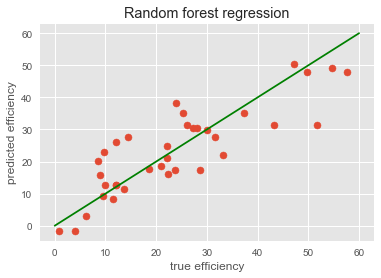

In [10]:
plt.scatter(y_test, y_predictions)
plt.plot([0, 60], [-0,60], 'g-', label='true line')
plt.xlabel('true efficiency')
plt.ylabel('predicted efficiency')
plt.title(' Random forest regression ')
plt.show()

In [15]:
# print predicted value and actual value to see how far off the prediction
# y_test = y_test.values.tolist()
for i, prediction in enumerate(y_predictions):
    print('Predicted: %.2f,  Actual: %s,  difference: %s' % (prediction, y_test[i], prediction-y_test[i]))

Predicted: 50.30,  Actual: [47.2],  difference: [ 3.10307388]
Predicted: 3.04,  Actual: [6.1],  difference: [-3.06245813]
Predicted: -1.59,  Actual: [0.9],  difference: [-2.4872252]
Predicted: 31.40,  Actual: [51.8],  difference: [-20.39693909]
Predicted: 18.67,  Actual: [21.0],  difference: [-2.33192825]
Predicted: 24.86,  Actual: [22.1],  difference: [ 2.76369133]
Predicted: 17.79,  Actual: [18.6],  difference: [-0.8127533]
Predicted: 27.59,  Actual: [31.5],  difference: [-3.90785408]
Predicted: 22.95,  Actual: [9.7],  difference: [ 13.24580078]
Predicted: 20.07,  Actual: [8.5],  difference: [ 11.57005501]
Predicted: 27.77,  Actual: [14.538461538461538],  difference: [ 13.23018661]
Predicted: 26.05,  Actual: [12.0],  difference: [ 14.05428314]
Predicted: 17.21,  Actual: [23.7],  difference: [-6.4864151]
Predicted: 12.82,  Actual: [10.0],  difference: [ 2.81774235]
Predicted: 30.58,  Actual: [28.0],  difference: [ 2.58449745]
Predicted: 35.10,  Actual: [25.3],  difference: [ 9.7974388

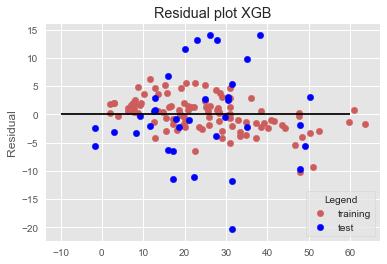

In [16]:
plt.scatter(regressor.predict(X_train), regressor.predict(X_train).reshape(len(X_train))-y_train.values.reshape(len(y_train)), c='indianred', s=40, 
           label='training')
plt.scatter(regressor.predict(X_test), regressor.predict(X_test).reshape(len(X_test))-np.asarray(y_test).reshape(len(y_test)), c='b', s=40,
            label ='test')
plt.hlines(y=0, xmin=-10, xmax=60)
plt.title('Residual plot XGB')
plt.ylabel('Residual')
plt.legend(loc=4, frameon=True, title='Legend');